In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('/content/bigmart_train.csv')
test=pd.read_csv('/content/bigmart_test.csv')

In [3]:
train.head(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print('train_data_shape: ',train.shape)
print('test_data_shape: ',test.shape)

train_data_shape:  (8523, 12)
test_data_shape:  (5681, 11)


Compare both the train and test data variable distribution

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [7]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
train['custom']='train'
test['custom']='test'

df=pd.concat([train,test],ignore_index=True)

In [11]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,custom
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [12]:
df.shape

(14204, 13)

In [13]:
col=df.columns
avoid_col=['Item_Outlet_Sales','custom']
for c in col:
  if c not in avoid_col:
    print(f'unique_counts for {c}')
    print(df[c].value_counts())

unique_counts for Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
unique_counts for Item_Weight
17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64
unique_counts for Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
unique_counts for Item_Visibility
0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64
unique_counts for Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods            

*here from the above cell,we should get the insights about paremeters, whether the parameter is categorical or discrete*

***EDA***

*Here I preferably doing visualization on the train data only because as we seen above in describe(), that both train and test data are similarly distributed*

In [14]:
import warnings
warnings.filterwarnings(action='ignore')

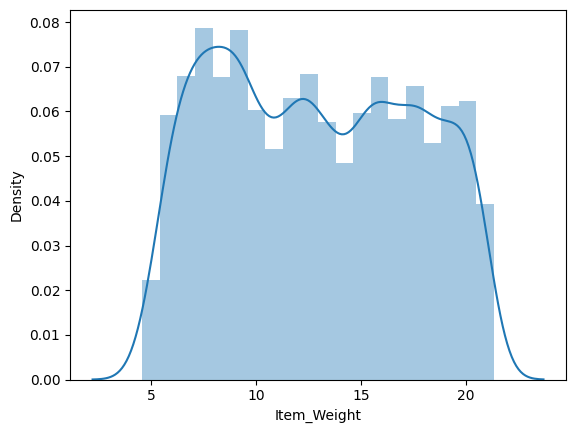

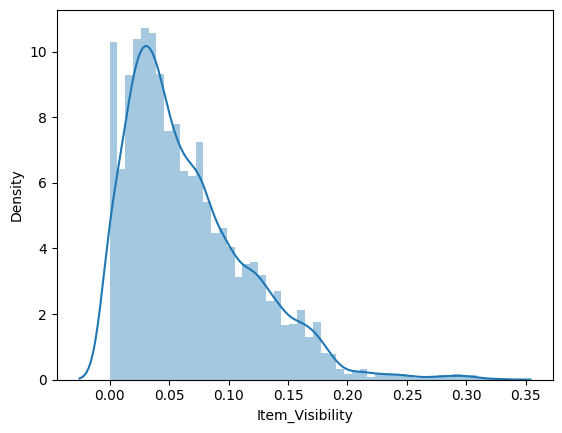

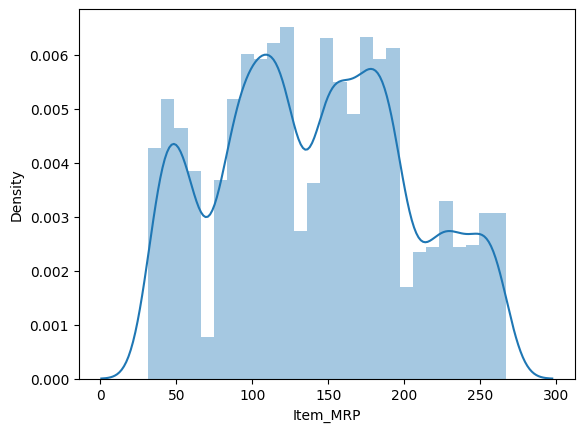

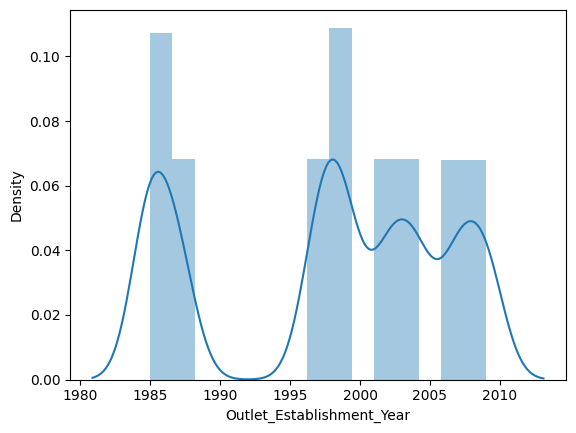

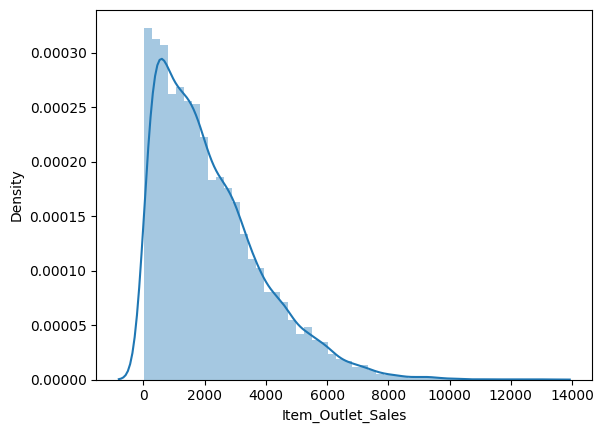

In [15]:
for col in train.describe().columns:
  sns.distplot(train[col])
  plt.show()

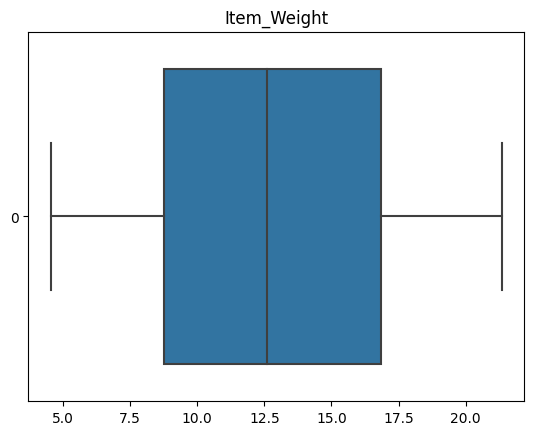

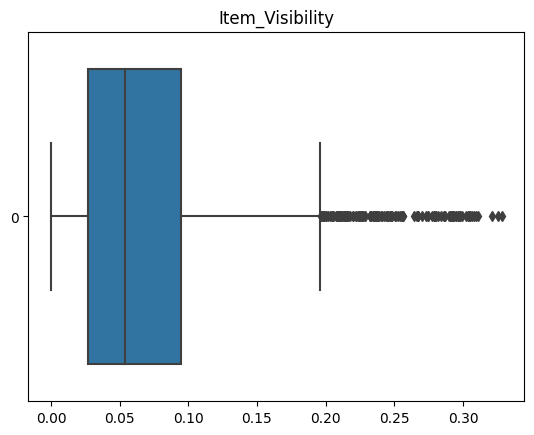

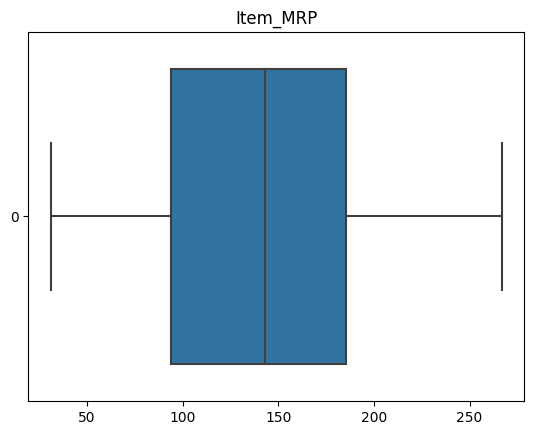

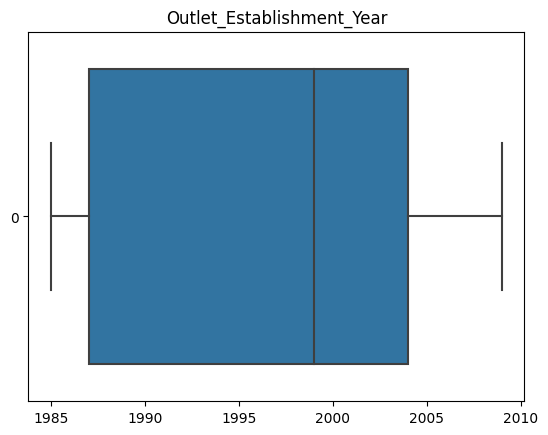

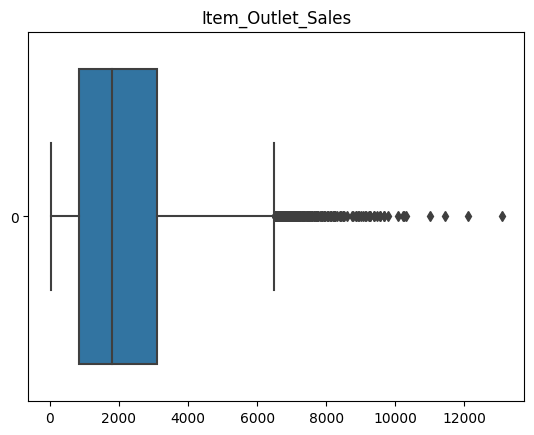

In [16]:
for col in train.describe().columns:
  sns.boxplot(train[col],orient='h')
  plt.title(col)
  plt.show()

**Univariete analysis**

In [17]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'custom'],
      dtype='object')

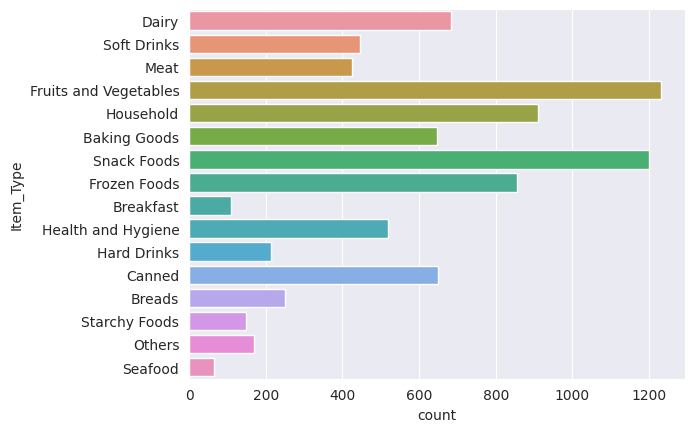

In [18]:
sns.set_style('darkgrid')
sns.countplot(y=train.Item_Type)

plt.show()

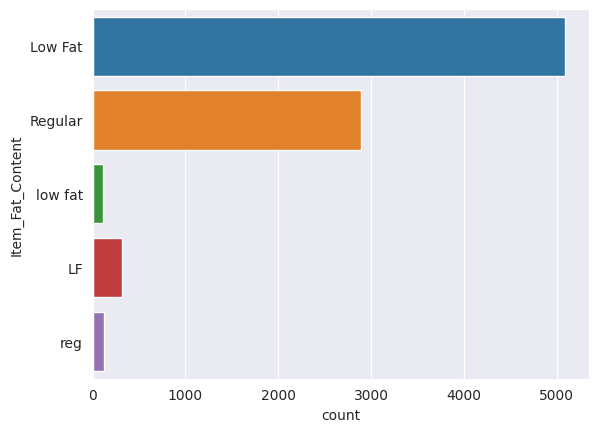

In [19]:
sns.countplot(y=train.Item_Fat_Content)
plt.show()

In [20]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'})

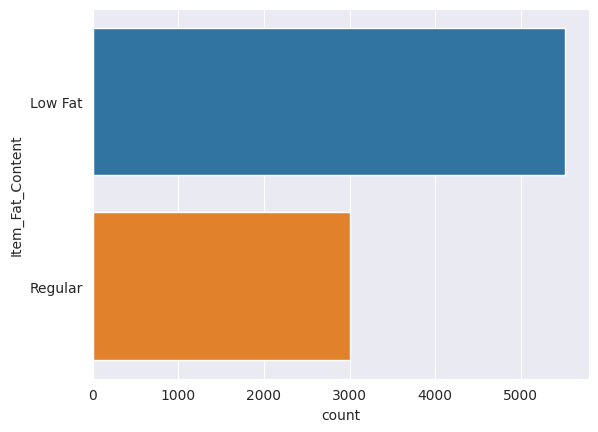

In [21]:
sns.countplot(y=train.Item_Fat_Content)
plt.show()

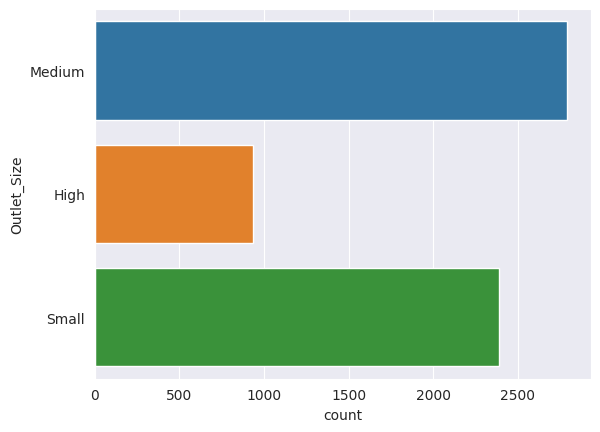

In [22]:
sns.countplot(y=train.Outlet_Size)
plt.show()

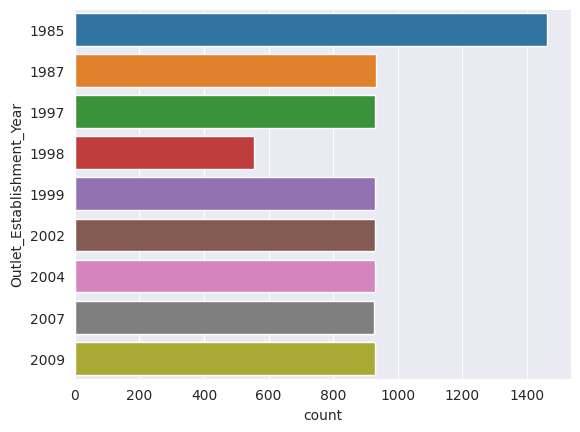

In [23]:
sns.countplot(y=train.Outlet_Establishment_Year)
plt.show()

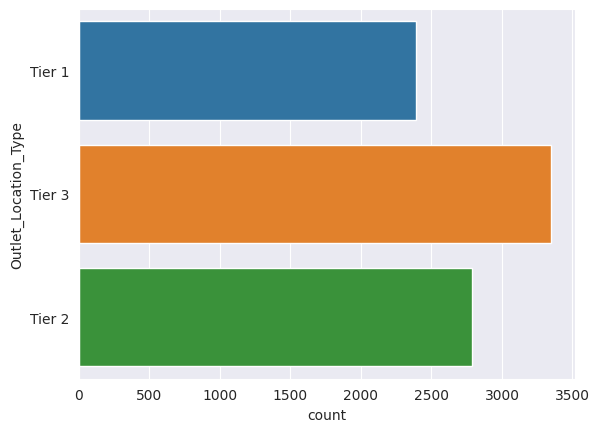

In [24]:
sns.countplot(y=train.Outlet_Location_Type)
plt.show()

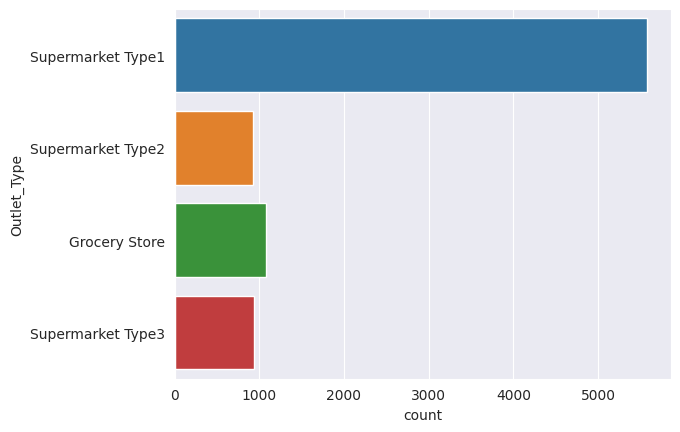

In [25]:
sns.countplot(y=train.Outlet_Type)
plt.show()

**Multivariete analysis**

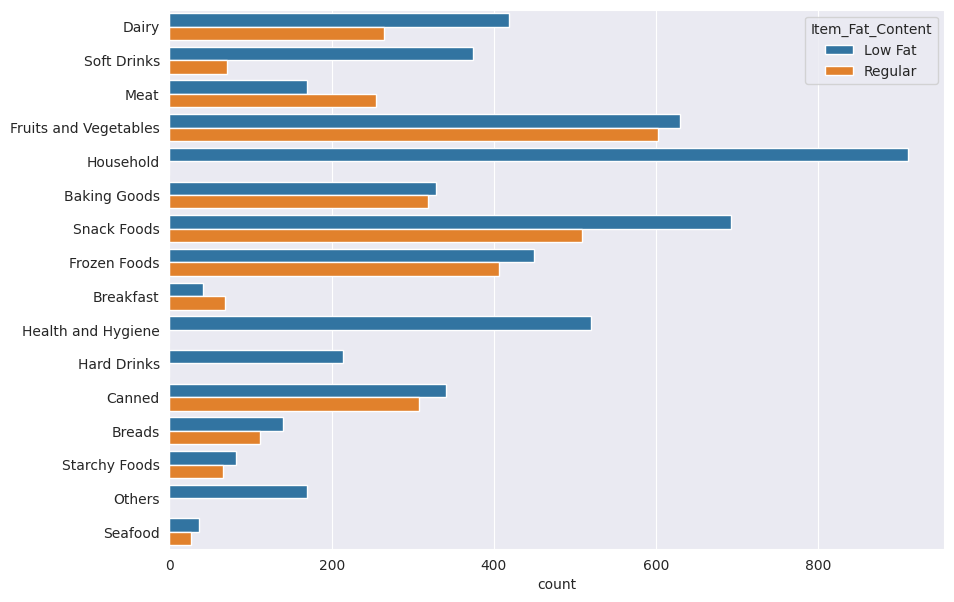

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(y=train.Item_Type,hue=train.Item_Fat_Content)
plt.ylabel(None)
plt.show()

In [27]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'custom'],
      dtype='object')

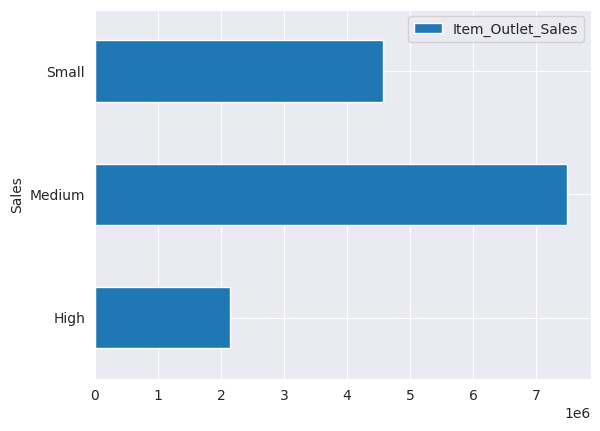

In [28]:
pd.pivot_table(data=train,index='Outlet_Size',values='Item_Outlet_Sales',aggfunc=np.sum).plot(kind='barh')
plt.ylabel('Sales')
plt.show()

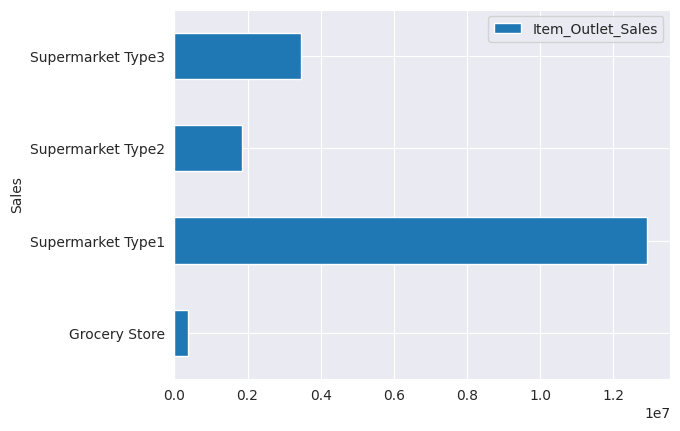

In [29]:
pd.pivot_table(data=train,index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.sum).plot(kind='barh')
plt.ylabel('Sales')
plt.show()

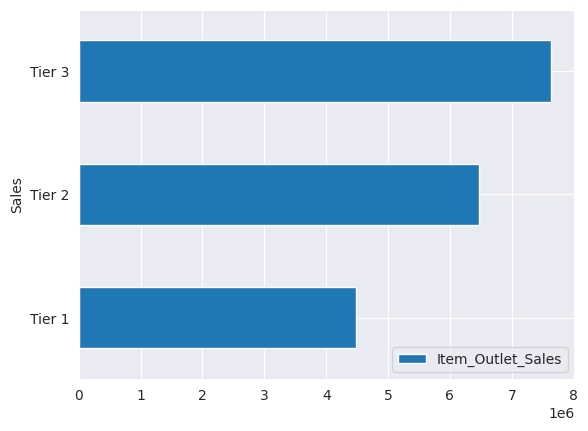

In [30]:
pd.pivot_table(data=train,index='Outlet_Location_Type',values='Item_Outlet_Sales',aggfunc=np.sum).plot(kind='barh')
plt.ylabel('Sales')
plt.show()

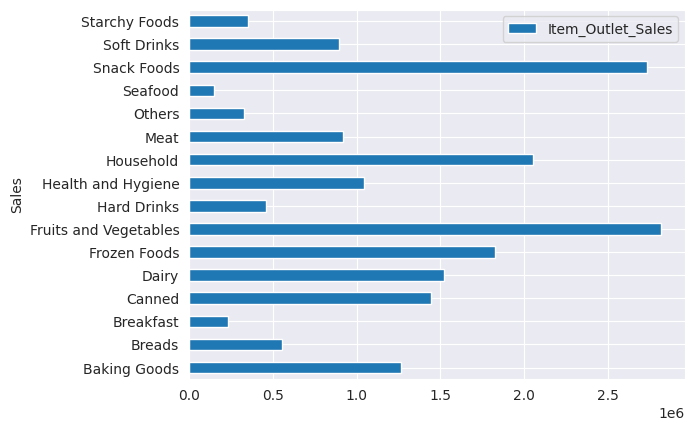

In [31]:
pd.pivot_table(data=train,index='Item_Type',values='Item_Outlet_Sales',aggfunc=np.sum).plot(kind='barh')
plt.ylabel('Sales')
plt.show()

<Figure size 2000x800 with 0 Axes>

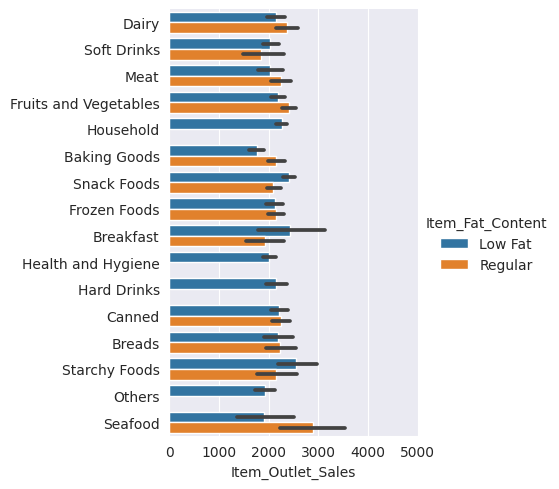

In [32]:
plt.figure(figsize=(20,8))
sns.catplot(
    data=train, kind="bar",
    y="Item_Type", x="Item_Outlet_Sales", hue="Item_Fat_Content",
)
plt.xlim(right=5000)
plt.ylabel(None)
plt.show()

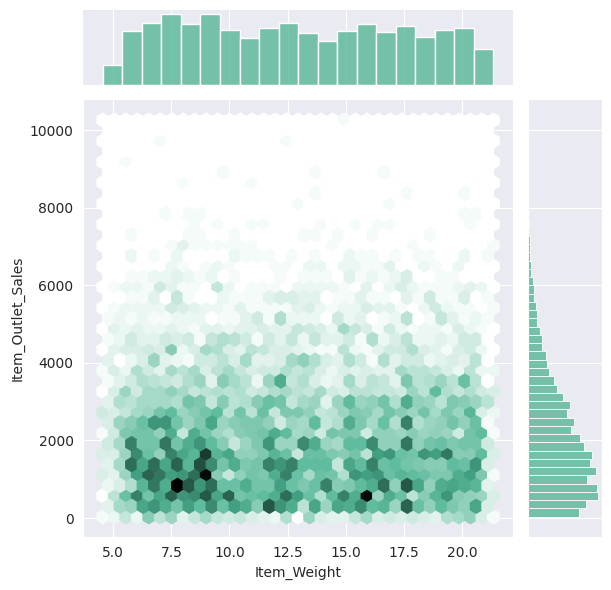

In [33]:
sns.jointplot(data=train,x='Item_Weight', y='Item_Outlet_Sales', kind="hex", color="#4CB391")
plt.show()

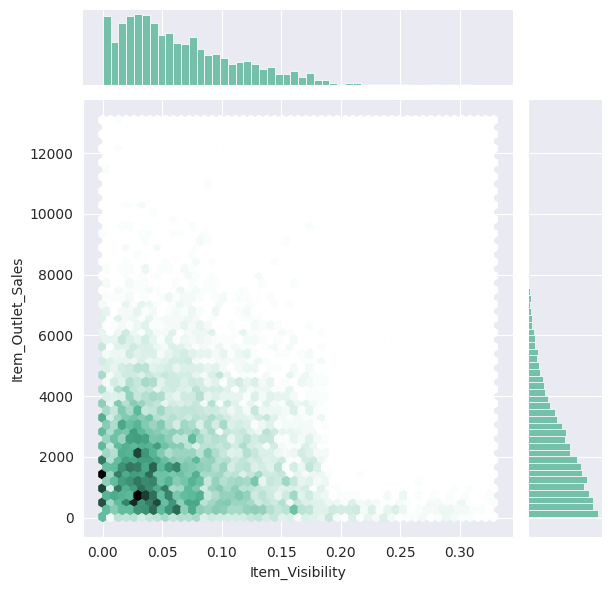

In [34]:
sns.jointplot(data=train,x='Item_Visibility', y='Item_Outlet_Sales', kind="hex", color="#4CB391")
plt.show()

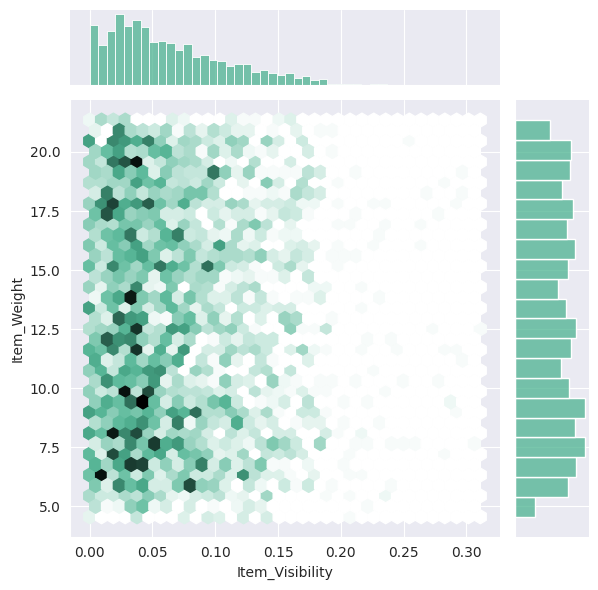

In [35]:
sns.jointplot(data=train,x='Item_Visibility', y='Item_Weight', kind="hex", color="#4CB391")
plt.show()

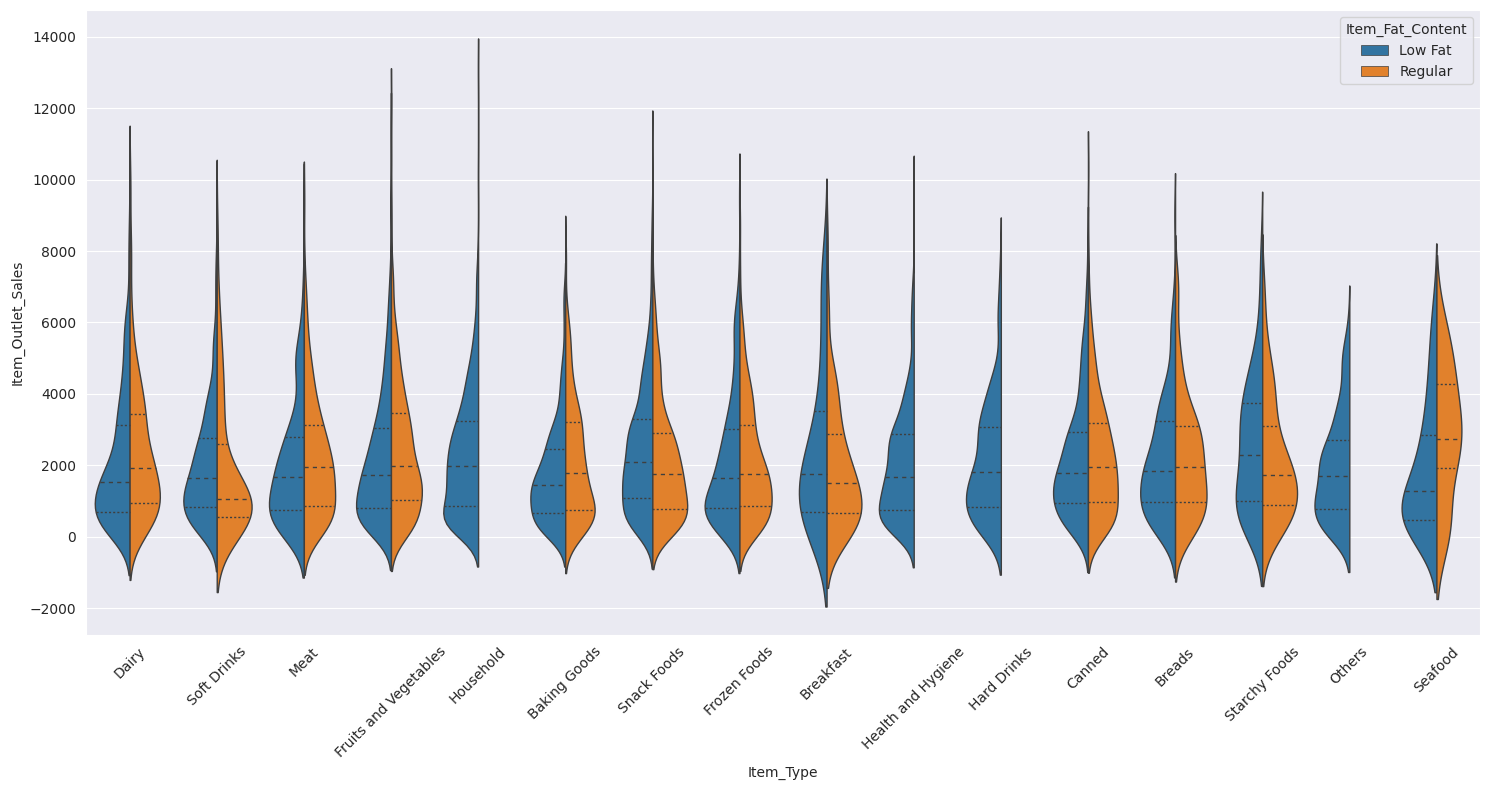

In [36]:
plt.figure(figsize=(15,8))
sns.violinplot(data=train, x="Item_Type", y="Item_Outlet_Sales", hue="Item_Fat_Content",
               split=True, inner="quart", linewidth=1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

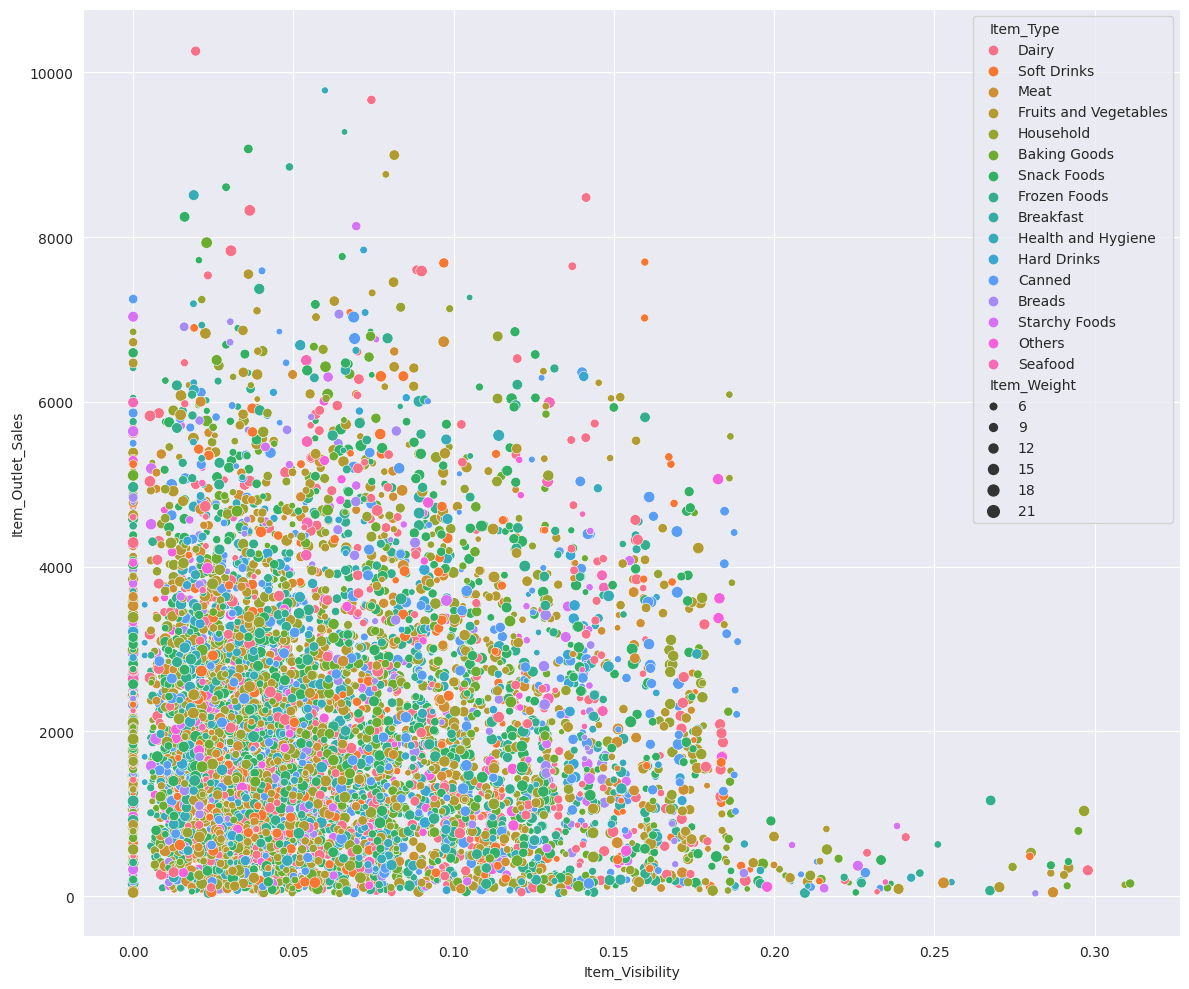

In [37]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=train,x='Item_Visibility', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight')
plt.tight_layout()
plt.show()

In [38]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


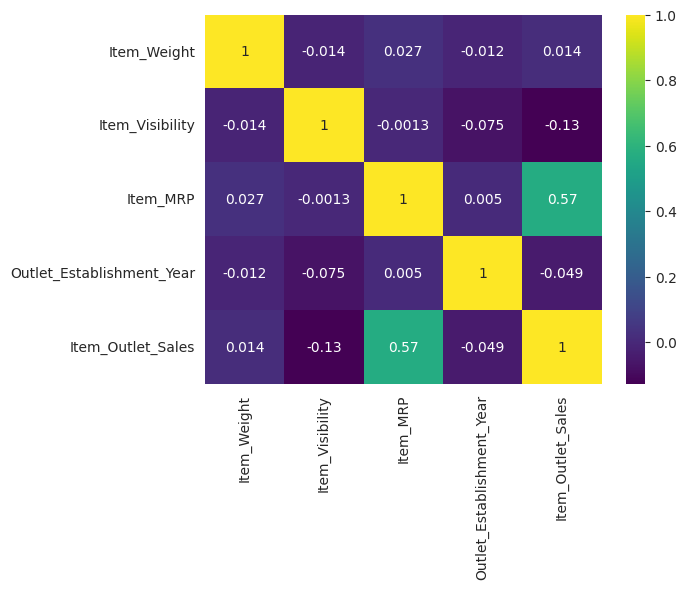

In [39]:
sns.heatmap(train.corr(),annot=True,cmap='viridis')
plt.show()

***Data Pre-processing***

In [40]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'custom'],
      dtype='object')

In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,custom
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [42]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x: x[:2]).replace({'FD':'Food_Items','DR':'Drinks','NC':'Non_Consumables'})
df['Item_Identifier'].head()

0         Food_Items
1             Drinks
2         Food_Items
3         Food_Items
4    Non_Consumables
Name: Item_Identifier, dtype: object

In [43]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'})

In [44]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [45]:
#getting the maximum outlet_size based on the individual outlet location types
t1_out_size=df[df['Outlet_Location_Type']=='Tier 1']['Outlet_Size'].value_counts().index[0]
t2_out_size=df[df['Outlet_Location_Type']=='Tier 2']['Outlet_Size'].value_counts().index[0]
t3_out_size=df[df['Outlet_Location_Type']=='Tier 3']['Outlet_Size'].value_counts().index[0]

In [46]:
print(t1_out_size,t2_out_size,t3_out_size)

Small Small Medium


In [47]:
# assigning the nulls in outletsize column with respective to the respective outlet_location_type
for ind,x in df.iterrows():
  if type(x['Outlet_Size'])==float:
    if x['Outlet_Location_Type']=='Tier 1':
      df.at[ind,'Outlet_Size']=t1_out_size
    elif x['Outlet_Location_Type']=='Tier 2':
      df.at[ind,'Outlet_Size']=t2_out_size
    elif x['Outlet_Location_Type']=='Tier 3':
      df.at[ind,'Outlet_Size']=t3_out_size
    

In [48]:
df['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.1429909 , 0.07352856,
       0.10472015])

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,custom
0,Food_Items,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,Food_Items,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,Food_Items,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,Non_Consumables,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [50]:
data_prod=pd.get_dummies(df,columns=['Item_Identifier','Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type',])

In [51]:
data_prod.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,custom,Item_Identifier_Drinks,Item_Identifier_Food_Items,Item_Identifier_Non_Consumables,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,train,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,train,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,train,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,train,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,train,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0


In [52]:
x_train=data_prod[data_prod['custom']=='train']
x_test=data_prod[data_prod['custom']=='test']

x_train.drop('custom',axis=True,inplace=True)
x_test.drop(['custom','Item_Outlet_Sales'],axis=True,inplace=True)

In [53]:
x_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_Drinks,Item_Identifier_Food_Items,Item_Identifier_Non_Consumables,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,549.2850,0,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [54]:
x_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_Drinks,Item_Identifier_Food_Items,Item_Identifier_Non_Consumables,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,20.750000,0.007565,107.8622,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
8524,8.300000,0.038428,87.3198,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8525,14.600000,0.099575,241.7538,0,0,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
8526,7.315000,0.015388,155.0340,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8527,12.792854,0.118599,234.2300,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500000,0.013496,141.3154,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
14200,7.600000,0.142991,169.1448,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
14201,10.000000,0.073529,118.7440,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
14202,15.300000,0.000000,214.6218,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [55]:
from scipy.stats import zscore

exp=x_train[['Item_MRP','Item_Weight','Item_Visibility']].apply(zscore)

In [56]:
exp.head()

,Item_MRP,Item_Weight,Item_Visibility
0,1.747454,-0.839226,-0.970732
1,-1.489023,-1.639047,-0.908111
2,0.010040,1.101168,-0.956917
3,0.660050,1.503445,-1.281758
4,-1.399220,-0.926780,-1.281758


In [57]:
x_train['Item_MRP']=exp['Item_MRP']

In [58]:
x_train['Item_Weight']=exp['Item_Weight']
x_train['Item_Visibility']=exp['Item_Visibility']

In [59]:
x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_Drinks,Item_Identifier_Food_Items,Item_Identifier_Non_Consumables,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.839226,-0.970732,1.747454,3735.1380,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,-1.639047,-0.908111,-1.489023,443.4228,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,1.101168,-0.956917,0.010040,2097.2700,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1.503445,-1.281758,0.660050,732.3800,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,-0.926780,-1.281758,-1.399220,994.7052,0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [60]:
from scipy.stats import zscore

exp1=x_test[['Item_MRP','Item_Weight','Item_Visibility']].apply(zscore)

In [61]:
x_test['Item_MRP']=exp1['Item_MRP']
x_test['Item_Weight']=exp1['Item_Weight']
x_test['Item_Visibility']=exp1['Item_Visibility']

In [62]:
x_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_Drinks,Item_Identifier_Food_Items,Item_Identifier_Non_Consumables,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,1.893454,-1.134077,-0.536555,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
8524,-1.039426,-0.531850,-0.868937,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8525,0.444682,0.661316,1.629848,0,0,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
8526,-1.271465,-0.981416,0.226697,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8527,0.018968,1.032540,1.508110,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [63]:
y_dt=x_train['Item_Outlet_Sales']
x_dt=x_train.drop('Item_Outlet_Sales',axis=True)

In [64]:
x_dt.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_Drinks,Item_Identifier_Food_Items,Item_Identifier_Non_Consumables,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.839226,-0.970732,1.747454,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,-1.639047,-0.908111,-1.489023,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1.101168,-0.956917,0.010040,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1.503445,-1.281758,0.660050,0,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,-0.926780,-1.281758,-1.399220,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [65]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_dt,y_dt,test_size=0.25,random_state=1)

***Linear Regression model***

In [66]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [67]:
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
pred=lr.predict(x_val)

In [69]:
from sklearn import metrics

In [70]:
print('accuracy: ',round(lr.score(x_val,y_val)*100))

accuracy:  56


In [71]:
pred

array([ 528.375, 1218.875, 3198.875, ...,  645.625, 2287.375, 1041.875])

***Decision Tree Regression***

In [92]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=80, min_samples_leaf=100)

tree.fit(x_train,y_train)
tree_pred = tree.predict(x_val)

In [93]:
tree.score(x_val,y_val)

0.593228216475753

In [81]:
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(y_val,tree_pred)))

RMSE:  27.64579246725837


In [82]:
param_trail={'max_depth':[80,100,60,130,150],
             'min_samples_leaf':[100,60,120,150,80],
             'max_features':['auto', 'sqrt', 'log2']}

In [88]:
from sklearn.model_selection import GridSearchCV

gridcv=GridSearchCV(tree,param_trail,cv=10)
gridcv_res=gridcv.fit(x_train,y_train)

In [90]:
gridcv_res.best_params_

{'max_depth': 80, 'max_features': 'auto', 'min_samples_leaf': 100}

In [91]:
gridcv_res.best_score_

0.5890087061805465

***Random Forest Regressor***

In [94]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

rf.fit(x_train,y_train)

rf_accuracy = round(rf.score(x_val,y_val)*100)

rf_accuracy

59

***xgBoost***

In [76]:
from xgboost import XGBRegressor

xg_model = XGBRegressor(n_estimators = 100, learning_rate=0.05)
xg_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [102]:
round(xg_model.score(x_val,y_val)*100)

59